# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
url = "http://api.openweathermap.org/data/2.5/weather?"
search = f"{url}appid={weather_api_key}&units={'imperial'}&q="
response = requests.get(search + city)
js = response.json()

citynum = 1
name = []
country = []
humidity = []
date = []
lat = []
lng = []
maximumtemp = []
wind = []
cloud = []
for city in cities:
    try:
        response = requests.get(search + city)
        js = response.json()
        name.append(js['name'])
        city_name = js['name']
        country.append(js['sys']['country'])
        humidity.append(js['main']['humidity'])
        date.append(js['dt'])
        lat.append(js['coord']['lat'])
        lng.append(js['coord']['lon'])
        maximumtemp.append(js['main']['temp_max'])
        wind.append(js['wind']['speed'])
        cloud.append(js['clouds']['all'])
        print(f'Processing city {citynum} - {city_name}')
        citynum += 1
    except:
        print('Error, no such city')


Processing city 1 - Punta Arenas
Processing city 2 - Hobart
Processing city 3 - Cape Town
Processing city 4 - Kapaa
Processing city 5 - Bredasdorp
Processing city 6 - Burnie
Processing city 7 - San Cristobal
Processing city 8 - Bovenden
Processing city 9 - Aksha
Processing city 10 - Polovinnoye
Processing city 11 - Chipinge
Processing city 12 - Albany
Processing city 13 - Nome
Processing city 14 - Comodoro Rivadavia
Processing city 15 - Boyolangu
Error, no such city
Processing city 16 - Deputatsky
Processing city 17 - Busselton
Error, no such city
Processing city 18 - Clyde River
Processing city 19 - Hilo
Processing city 20 - Montepuez
Processing city 21 - Ambunti
Processing city 22 - Dikson
Processing city 23 - Bumba
Processing city 24 - Bluff
Processing city 25 - Raahe
Processing city 26 - Nikolskoye
Error, no such city
Processing city 27 - Chokurdakh
Processing city 28 - Lorengau
Processing city 29 - Pevek
Error, no such city
Processing city 30 - Olinda
Processing city 31 - Atuona
P

Processing city 254 - Muncar
Processing city 255 - Havøysund
Processing city 256 - Conde
Processing city 257 - Neryungri
Processing city 258 - Mayo
Processing city 259 - Icod de los Vinos
Processing city 260 - Puerto Carreño
Processing city 261 - Kulhudhuffushi
Processing city 262 - Paamiut
Processing city 263 - Ranong
Processing city 264 - Itaú de Minas
Processing city 265 - Balkanabat
Processing city 266 - Pyapon
Processing city 267 - Athlone
Processing city 268 - Samarai
Processing city 269 - Castro
Error, no such city
Processing city 270 - Winnemucca
Processing city 271 - Pandan
Processing city 272 - Berlevåg
Processing city 273 - Tulagi
Processing city 274 - Talcahuano
Processing city 275 - Leningradskiy
Processing city 276 - Aswān
Processing city 277 - Saint-François
Processing city 278 - Kaseda-shirakame
Processing city 279 - Kupang
Processing city 280 - Meadow Lake
Processing city 281 - Iquique
Error, no such city
Processing city 282 - Oxbow
Processing city 283 - Talnakh
Proces

Processing city 504 - Kudahuvadhoo
Processing city 505 - La Santisima Trinidad
Error, no such city
Processing city 506 - Trincomalee
Error, no such city
Processing city 507 - Dhrāngadhra
Processing city 508 - Lakhdenpokh'ya
Processing city 509 - Jieshi
Processing city 510 - Janakpur Dham
Processing city 511 - Cap Malheureux
Processing city 512 - Sibay
Processing city 513 - Bima
Processing city 514 - Tabou
Processing city 515 - Yeniseysk
Processing city 516 - Lincoln
Processing city 517 - Noumea
Processing city 518 - Romanovo
Error, no such city
Processing city 519 - Merauke
Processing city 520 - Chenzhou
Processing city 521 - Santiago de Cuba
Processing city 522 - Sémbé
Processing city 523 - Roseburg
Processing city 524 - Mahibadhoo
Processing city 525 - Lensk
Processing city 526 - Saint-Pierre
Processing city 527 - Killybegs
Processing city 528 - Pochutla
Processing city 529 - Kyabram
Processing city 530 - Faya
Processing city 531 - Kenai
Processing city 532 - Cabras
Error, no such ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [99]:
df = pd.DataFrame({'City':name,
                  'Country':country,
                  'Date':date,
                  'Latitude':lat,
                  'Longitude':lng,
                  'Max Temp (F)':maximumtemp,
                  'Humidity':humidity,
                  'Cloud Coverage (%)':cloud,
                  'Wind (MPH)':wind})
df.head()
df.to_csv('output_data/weather_api.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
df[df['Humidity'] > 100].count()

City                  0
Country               0
Date                  0
Latitude              0
Longitude             0
Max Temp (F)          0
Humidity              0
Cloud Coverage (%)    0
Wind (MPH)            0
dtype: int64

In [4]:
#  Get the indices of cities that have humidity over 100%.
# N/A

In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

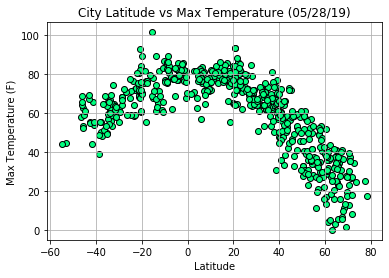

In [43]:
lat = df['Latitude']
temp = df['Max Temp (F)']
plt.scatter(lat,temp,facecolors='springgreen',edgecolor='black')
plt.title('City Latitude vs Max Temperature (05/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/Latitude_vs_MaxTemp.png')

This plot is analyzing the relationship between Latitude and Temperature.

## Latitude vs. Humidity Plot

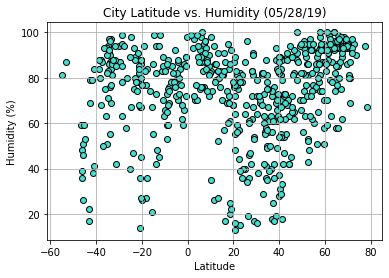

In [48]:
hum = df['Humidity']
plt.scatter(lat,hum,facecolors='turquoise',edgecolors='black')
plt.title('City Latitude vs. Humidity (05/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('output_data/Latitude_vs_Humidity.png')

This plot is analyzing the relationship between Latitude and Humidity.

## Latitude vs. Cloudiness Plot

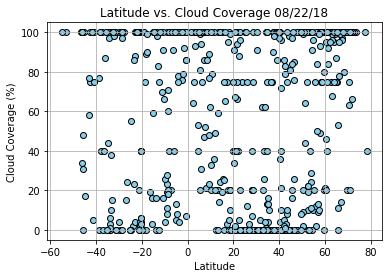

In [49]:
cloudy = df['Cloud Coverage (%)']
plt.scatter(lat,cloudy,facecolors='skyblue',edgecolors='black')
plt.title('Latitude vs. Cloud Coverage 08/22/18')
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage (%)')
plt.grid()
plt.savefig('output_data/Latitude_vs_CloudCoverage.png')

This plot is analyzing the relationship between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

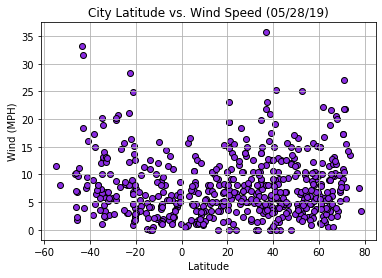

In [52]:
windspd = df['Wind (MPH)']
plt.scatter(lat,windspd,facecolors='blueviolet',edgecolors='black')
plt.title('City Latitude vs. Wind Speed (05/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.grid()
plt.savefig('output_data/Latitude_vs_WindSpeed.png')

This plot is analyzing the relationship between Latitude and Wind Speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.76
The correlation coefficient is: -0.87


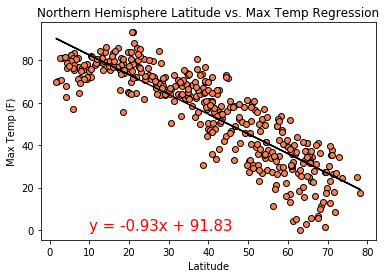

In [101]:
north = df[df['Latitude'] >= 0]
nlat = north['Latitude']
ntemp = north['Max Temp (F)']
corr = st.pearsonr(nlat,ntemp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ntemp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat,ntemp,facecolors='coral',edgecolors='black')
plt.plot(nlat,regress_values,"r-",color='black')
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude vs. Max Temp Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The correlation coefficient is: {round(corr[0],2)}")
plt.savefig('output_data/North_Latitude_vs_MaxTemp_Reg.png')

This linear regression is measuring the correlation between Latitude and Max Temp in the Northern Hemisphere. As you can see by the correlation coefficient, there is a strong negative correlation between the two.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.53
The correlation coefficient is: 0.73


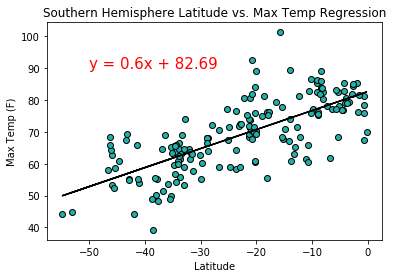

In [102]:
south = df[df['Latitude'] < 0]
slat = south['Latitude']
stemp = south['Max Temp (F)']
corr = st.pearsonr(slat,stemp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, stemp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat,stemp,facecolors='lightseagreen',edgecolors='black')
plt.plot(slat,regress_values,"r-",color='black')
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude vs. Max Temp Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The correlation coefficient is: {round(corr[0],2)}")
plt.savefig('output_data/South_Latitude_vs_MaxTemp_Reg.png')

This linear regression is measuring the correlation between Latitude and Max Temp in the Southern Hemisphere. As you can see by the correlation coefficient, there is a strong positive correlation between the two.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05
The correlation coefficient is: 0.22


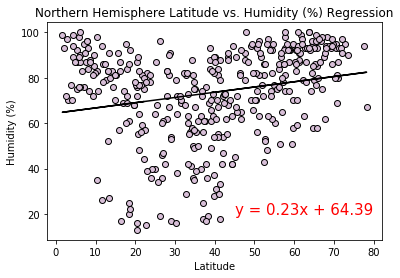

In [103]:
nhum = north['Humidity']
corr = st.pearsonr(nlat,nhum)
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nhum)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat,nhum,facecolors='thistle',edgecolors='black')
plt.plot(nlat,regress_values,"r-",color='black')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude vs. Humidity (%) Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The correlation coefficient is: {round(corr[0],2)}")
plt.savefig('output_data/North_Latitude_vs_Humidity_Reg.png')

This linear regression is measuring the correlation between Latitude and Humidity in the Northern Hemisphere. As you can see by the correlation coefficient, there is a weak positive correlation between the two.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02
The correlation coefficient is: 0.13


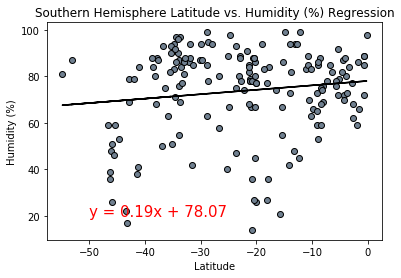

In [104]:
shum = south['Humidity']
corr = st.pearsonr(slat,shum)
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, shum)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat,shum,facecolors='slategrey',edgecolors='black')
plt.plot(slat,regress_values,"r-",color='black')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude vs. Humidity (%) Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The correlation coefficient is: {round(corr[0],2)}")
plt.savefig('output_data/South_Latitude_vs_Humidity_Reg.png')

This linear regression is measuring the correlation between Latitude and Humility in the Southern Hemisphere. As you can see by the correlation coefficient, there is a very weak positive correlation between the two.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05
The correlation coefficient is: 0.21


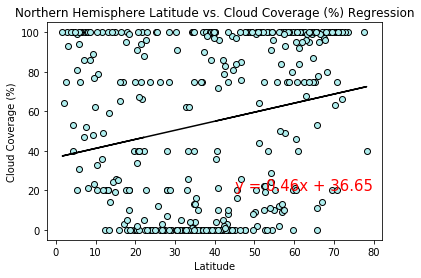

In [105]:
ncloud = north['Cloud Coverage (%)']
corr = st.pearsonr(nlat,ncloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ncloud)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat,ncloud,facecolors='paleturquoise',edgecolors='black')
plt.plot(nlat,regress_values,"r-",color='black')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude vs. Cloud Coverage (%) Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage (%)')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The correlation coefficient is: {round(corr[0],2)}")
plt.savefig('output_data/North_Latitude_vs_Cloud_Reg.png')

This linear regression is measuring the correlation between Latitude and Cloudiness in the Northern Hemisphere. As you can see by the correlation coefficient, there is a weak positive correlation between the two.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0
The correlation coefficient is: -0.02


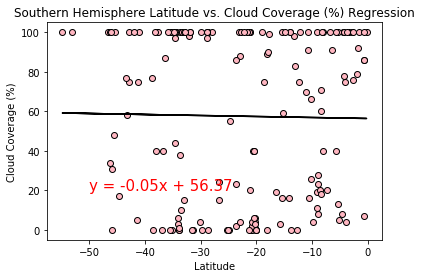

In [106]:
scloud = south['Cloud Coverage (%)']
corr = st.pearsonr(slat,scloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, scloud)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat,scloud,facecolors='lightpink',edgecolors='black')
plt.plot(slat,regress_values,"r-",color='black')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude vs. Cloud Coverage (%) Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage (%)')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The correlation coefficient is: {round(corr[0],2)}")
plt.savefig('output_data/South_Latitude_vs_Cloud_Reg.png')

This linear regression is measuring the correlation between Latitude and Cloudiness in the Southern Hemisphere. As you can see by the correlation coefficient, there is no correlation between the two (negligibly negative).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02
The correlation coefficient is: 0.15


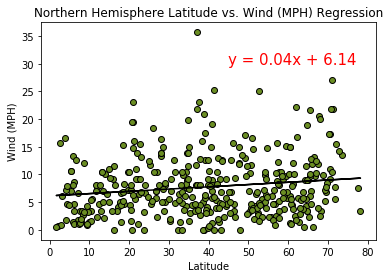

In [107]:
nwind = north['Wind (MPH)']
corr = st.pearsonr(nlat,nwind)
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nwind)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat,nwind,facecolors='olivedrab',edgecolors='black')
plt.plot(nlat,regress_values,"r-",color='black')
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude vs. Wind (MPH) Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The correlation coefficient is: {round(corr[0],2)}")
plt.savefig('output_data/North_Latitude_vs_Wind_Reg.png')

This linear regression is measuring the correlation between Latitude and Wind Speed in the Northern Hemisphere. As you can see by the correlation coefficient, there is a weak positive correlation between the two.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09
The correlation coefficient is: -0.31


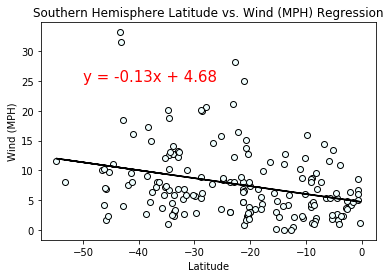

In [108]:
swind = south['Wind (MPH)']
corr = st.pearsonr(slat,swind)
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, swind)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat,swind,facecolors='azure',edgecolors='black')
plt.plot(slat,regress_values,"r-",color='black')
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude vs. Wind (MPH) Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The correlation coefficient is: {round(corr[0],2)}")
plt.savefig('output_data/South_Latitude_vs_Wind_Reg.png')

This linear regression is measuring the correlation between Latitude and Wind Speed in the Southern Hemisphere. As you can see by the correlation coefficient, there is a weak to moderate negative correlation between the two.